In [8]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns


height_cm                  -0.004041
weight_kg                   0.030995
potential                   0.632479
pac                         0.217670
sho                         0.341331
pas                         0.446347
dri                         0.434760
def                         0.154501
phy                         0.274917
international_reputation    0.697215
skill_moves                 0.241995
weak_foot                   0.163465
preferred_foot              0.007540
crossing                    0.275032
finishing                   0.269731
heading_accuracy            0.203954
Name: y, dtype: float64


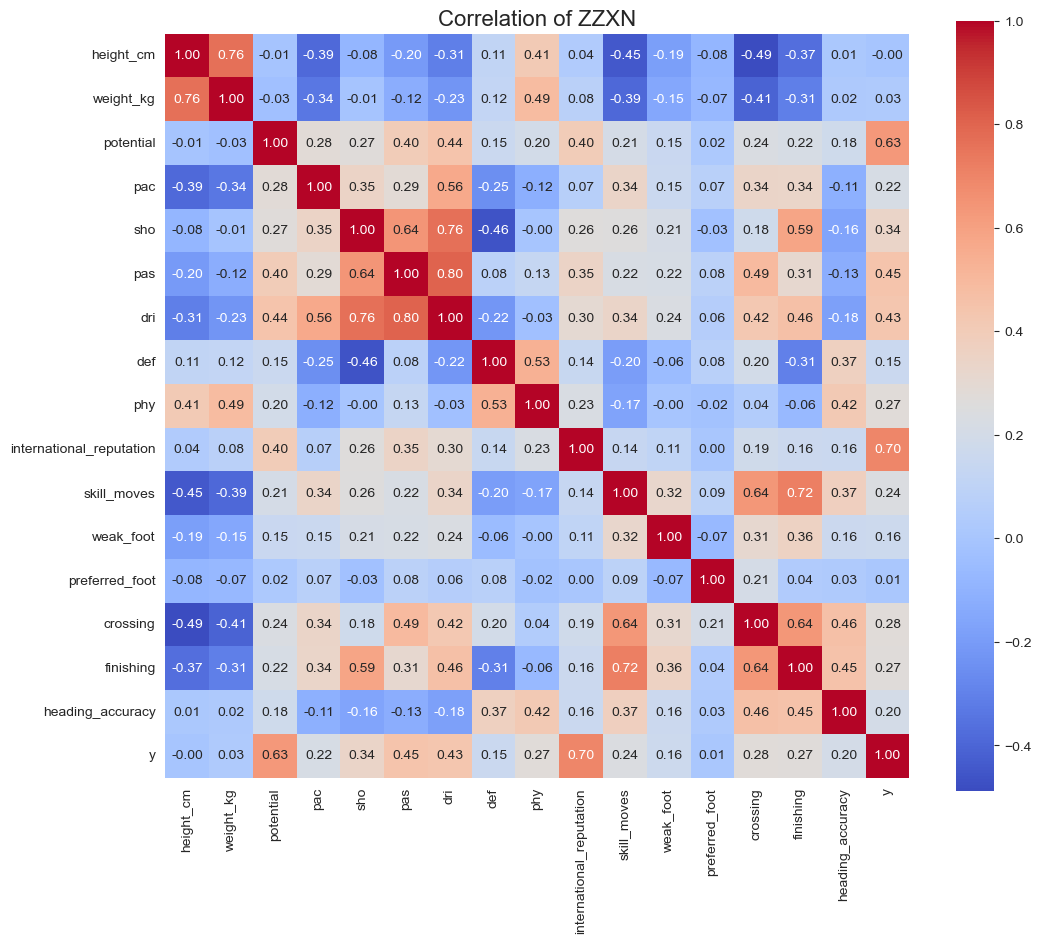

In [9]:
data = pd.read_csv(r"D:\文档\作战效能\xgboost_try_data\data\train.csv")
cols = ['height_cm', "weight_kg",'potential', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'international_reputation', 'skill_moves', 'weak_foot', 'preferred_foot',"crossing","finishing","heading_accuracy","y"]
df = data[cols]
corr_matrix = df.corr()
corr_with_y = corr_matrix["y"].drop("y")
print(corr_with_y)

# 设置画布大小
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,        # 显示数值
    fmt=".2f",         # 保留两位小数
    cmap="coolwarm",   # 配色
    square=True        # 方形格子
)
plt.title("Correlation of ZZXN", fontsize=16)
plt.show()

height_cm                  -0.014667
weight_kg                   0.043166
potential                   0.769655
pac                         0.352427
sho                         0.461366
pas                         0.592138
dri                         0.628776
def                         0.273976
phy                         0.451163
international_reputation    0.409816
skill_moves                 0.288173
weak_foot                   0.213109
preferred_foot              0.039091
crossing                    0.456456
finishing                   0.393362
heading_accuracy            0.387027
Name: y, dtype: float64


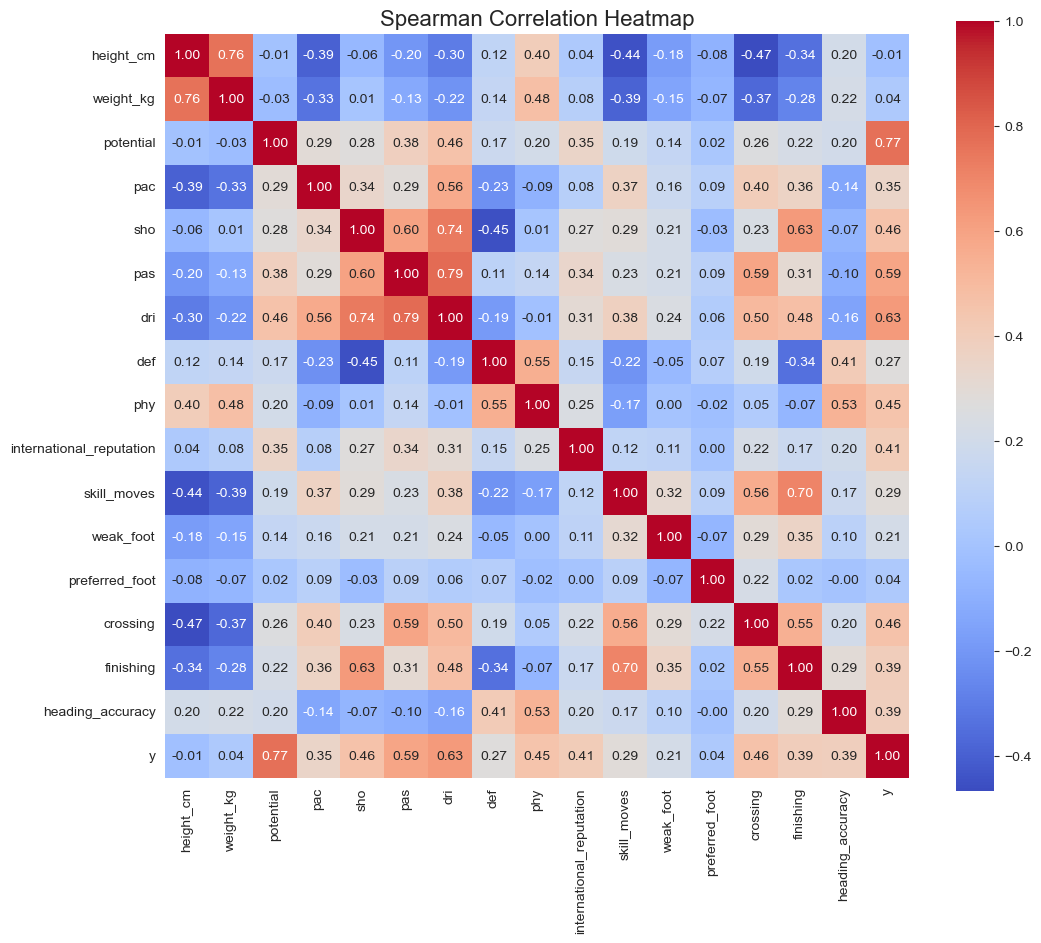

In [10]:
corr_matrix_spearman = df.corr(method="spearman")
corr_matrix_spearman_with_y = df.corr(method="spearman")["y"].drop("y")
print(corr_matrix_spearman_with_y)
# 设置画布大小
plt.figure(figsize=(12, 10))

# 绘制 Spearman 相关性热图
sns.heatmap(
    corr_matrix_spearman,
    annot=True,        # 显示数值
    fmt=".2f",         # 保留两位小数
    cmap="coolwarm",   # 配色
    square=True        # 方形格子
)

plt.title("Spearman Correlation Heatmap", fontsize=16)
plt.show()

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from joblib import dump

# 读取数据
data = pd.read_csv(r"D:\文档\作战效能\xgboost_try_data\data\train.csv")
cols = ['height_cm', "weight_kg", 'potential', 'pac', 'sho', 'pas', 'dri', 
        'def', 'phy', 'international_reputation', 'skill_moves', 'weak_foot', 
        'preferred_foot', "crossing", "finishing", "heading_accuracy", "y"]
cols_x = cols[:-1]  # 所有特征列

data = data[cols]

# 计算归一化参数
min_vals = data.min()
max_vals = data.max()
ranges = max_vals - min_vals

# 应用归一化
data_normalized = (data - min_vals) / ranges

# 分割数据
X_train, X_test, y_train, y_test = train_test_split(
    data_normalized[cols_x], 
    data_normalized["y"], 
    test_size=0.2, 
    random_state=42
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
data_normalized


(8352, 16) (2089, 16) (8352,) (2089,)


,height_cm,weight_kg,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,preferred_foot,crossing,finishing,heading_accuracy,y
0,177,72,73,65,60,63,67,47,59,1,3,3,1,60,63,56,70.0
1,178,70,62,56,39,60,63,63,57,1,2,3,1,69,51,40,24.0
2,177,69,68,68,57,39,55,19,48,1,2,3,2,29,64,56,17.0
3,181,81,81,76,74,74,77,77,76,3,3,3,1,64,72,80,1750.0
4,179,75,72,40,62,74,71,65,67,2,3,2,2,74,58,53,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10436,176,79,75,74,43,51,53,61,62,1,3,2,1,56,39,52,55.0
10437,178,68,62,66,38,55,55,59,69,1,2,3,2,58,36,56,25.0
10438,178,72,77,81,77,60,73,23,64,1,3,3,1,57,76,77,1000.0
10439,186,79,76,70,74,59,71,32,75,1,2,4,1,53,77,78,800.0


In [11]:
from xgboost import  XGBRegressor
from joblib import dump, load
# 训练xgboost回归模型
# 设置参数
params = {
    "objective": "reg:squarederror",  # 回归任务
    "eval_metric": "rmse",            # 评估指标
    "eta": 0.1,                       # 相当于 learning_rate
    "max_depth": 8,
    "max_leaves":200,
    "subsample": 0.6,
    "colsample_bytree": 0.6,
    "nthread":-1,
    "seed":42,
    "learning_rate":0.01
}


# 训练模型
model = XGBRegressor(**params,n_estimators=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# 保存到文件
dump(model, "xgb_model.pkl")
dump(min_vals, "min_vals.pkl")
dump(max_vals, "max_vals.pkl")
dump(ranges, "ranges.pkl")
# 回归评估指标
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")


MSE: 0.0006
MAE: 0.0093
R²: 0.9207


In [11]:
import os, sys
from joblib import load
import tkinter as tk
from tkinter import messagebox

# ============== 路径修复函数（打包exe时必备） ==============
def resource_path(relative_path):
    """获取资源文件的绝对路径（支持 PyInstaller 打包后）"""
    try:
        # PyInstaller 创建临时文件夹，并把路径存在 _MEIPASS
        base_path = sys._MEIPASS
    except Exception:
        base_path = os.path.abspath(".")
    return os.path.join(base_path, relative_path)

# ============== 1. 加载模型 ==============
model_path = resource_path("xgb_model.pkl")   # 自动识别路径
model = load(model_path)

# ============== 2. 特征名称（必须与训练时一致） ==============
feature_names = [
    'height_cm', "weight_kg", 'potential', 'pac', 'sho', 'pas', 'dri',
    'def', 'phy', 'international_reputation', 'skill_moves', 'weak_foot',
    'preferred_foot', "crossing", "finishing", "heading_accuracy"
]

# ============== 3. 预测函数 ==============
def predict():
    try:
        values = [float(entry.get()) for entry in entries]
        X = np.array(values).reshape(1, -1)
        y_pred = model.predict(X)
        messagebox.showinfo("预测结果", f"预测的 Y 值为：{y_pred[0]:.3f}")
    except ValueError:
        messagebox.showerror("错误", "请确保所有输入都是数字。")
    except Exception as e:
        messagebox.showerror("错误", str(e))

# ============== 4. 创建界面 ==============
root = tk.Tk()
root.title(" XGBoost 预测器")
root.geometry("360x700")
root.configure(bg="white")

tk.Label(root, text="请输入各特征值：", font=("Arial", 12, "bold"), bg="white").pack(pady=10)

entries = []
for feat in feature_names:
    frame = tk.Frame(root, bg="white")
    frame.pack(pady=4)
    tk.Label(frame, text=feat, width=22, anchor="w", bg="white").pack(side="left")
    e = tk.Entry(frame, width=10)
    e.pack(side="right")
    entries.append(e)

tk.Button(
    root, text="开始预测", command=predict,
    bg="#4CAF50", fg="white", width=15, height=1
).pack(pady=20)

root.mainloop()


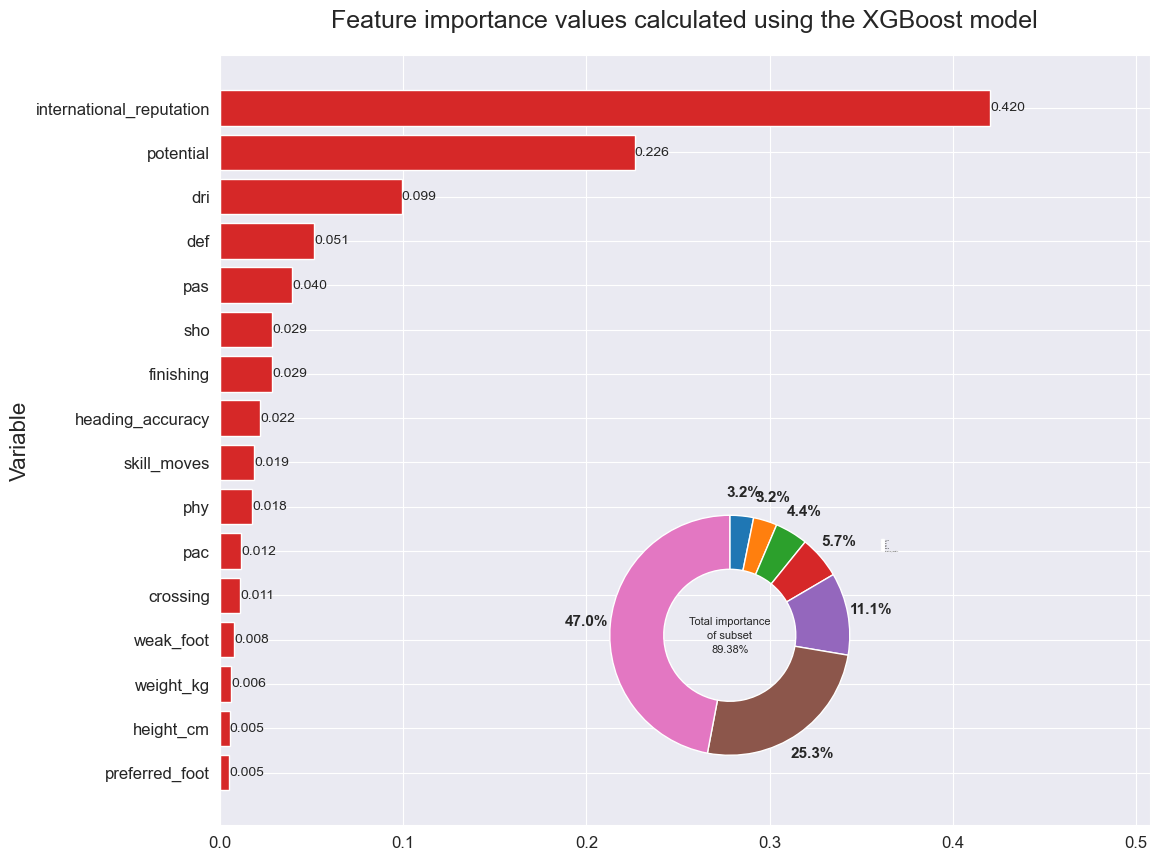

In [12]:
#绘制xgboost内置重要性图
import matplotlib
# 4. 提取并绘制特征重要性图
# 从训练好的模型中提取特征重要性分数
importances = model.feature_importances_
# 获取模型计算出的各个特征的重要性分数
# 创建一个新的DataFrame来存储特征名称和其对应的重要性分数
df_importance = pd.DataFrame({'feature': cols_x,'importance': importances})
# 为了后续绘图方便，按重要性升序排列DataFrame（因为barh绘图会自动反转顺序）
df_importance = df_importance.sort_values(by='importance', ascending=True)
# 创建一个图窗(fig)和一个坐标轴(ax)，并设置画布大小
fig, ax = plt.subplots(figsize=(12,10))#创建一个12x10英寸的画布
#  4.1 绘制水平条形图
bars = ax.barh(df_importance['feature'], df_importance['importance'], color='#d62828', label='Importance')
# 绘制水平条形图，y轴是特征名，x轴是重要性值
ax.set_title(r'Feature importance values calculated using the XGBoost model', fontsize=18, pad=20)
# 设置图表标题
ax.set_ylabel('Variable', fontsize=16)
# 设置y轴标签
ax.tick_params(axis='both', which='major', labelsize=12)
# 设置坐标轴刻度的字体大小
for bar in bars:# 遍历每一个条形
    width = bar.get_width()# 获取条形的宽度（即特征重要性值）
    ax.text(width, bar.get_y() + bar.get_height()/2,# 在条形右侧添加文本
    f'{width:.3f}', va='center', ha='left', fontsize=10)
# 文本内容为保留三位小数的重要性值
ax.set_xlim(right=ax.get_xlim()[1] *1.15)# 将x轴的右边界扩大15%，以防标签超出边界
#  4.2 绘制环圈图
donut_features = df_importance['feature'][9 :]
# 定义一个列表，包含我们想在环圈图中显示的特征
df_donut = df_importance[df_importance['feature'].isin(donut_features)].copy()
# 从完整的重要性数据中筛选出这些特征
df_donut['feature'] = pd.Categorical(df_donut['feature'], categories=donut_features, ordered=True)
# 将特征列转换为有序的类别类型，以保证绘图顺序
df_donut = df_donut.sort_values('feature')
# 按照定义的类别顺序进行排序
if not df_donut.empty and df_donut['importance'].sum() > 0:# 检查筛选后的数据不为空且重要性总和大于0
    total_donut_importance = df_donut['importance'].sum()# 计算这几个特征的重要性总和
    donut_percentages_raw = df_donut['importance'] / total_donut_importance *100# 计算每个特征在子集中的重要性百分比
    ax_inset = fig.add_axes([0.4,0.15,0.3,0.3])# 在主图的指定位置([左, 下, 宽, 高])创建一个新的内嵌坐标轴
    colors = matplotlib.colormaps.get('tab10').colors# 获取一个名为'tab10'的颜色映射表
    wedges, texts = ax_inset.pie(# 绘制饼图（通过设置wedgeprops实现环圈效果）
        donut_percentages_raw,# 饼图的数值（百分比）
        colors=colors[:len(df_donut)], startangle=90, counterclock=False,# 设置颜色、起始角度、绘制方向
    wedgeprops=dict(width=0.45, edgecolor='w') )# 设置环圈的宽度和边缘颜色，从而制作出环圈图
    subset_importance_ratio = df_donut['importance'].sum() / df_importance['importance'].sum() #计算子集特征重要性占总重要性的
    ax_inset.text(0,0,f'Total importance\nof subset\n{subset_importance_ratio:.2%}',# 在环圈图中央添加文本
            ha='center', va='center', fontsize=8, linespacing=1.5)# 设置文本内容、对齐方式、字体大小等
    label_threshold =2.0# 设置一个阈值，用于决定标签的显示方式
    y_text_offsets = {'left':1.4,'right':1.4}# 初始化标签在y轴方向的偏移量，用于避免重叠
    for i, p in enumerate(wedges):# 遍历环圈的每一个扇区
        percent = donut_percentages_raw.iloc[i]# 获取当前扇区的百分比
        ang = (p.theta2 - p.theta1) /2.+ p.theta1# 计算扇区中间的角度
        y = np.sin(np.deg2rad(ang))# 根据角度计算标签的y坐标
        x = np.cos(np.deg2rad(ang))# 根据角度计算标签的x坐标
        if percent < label_threshold and percent > 0:# 如果百分比小于阈值（太小了）
            side ='right' if x > 0 else 'left'# 判断标签在图的左侧还是右侧
            y_pos = y_text_offsets[side]# 获取当前侧的y轴偏移量
            y_text_offsets[side] += -0.2 if y > 0 else 0.2 # 更新偏移量，避免下一个标签重叠
            connectionstyle =f"angle,angleA=0,angleB={ang}"# 定义连接线的样式
            ax_inset.annotate(f'{percent:.1f}%', xy=(x, y), xytext=(0.1*np.sign(x), y_pos),# 使用annotate添加带连接线的标签
            fontsize=10, ha='center', arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle))#设置箭头和连接线
        elif percent > 0:# 如果百分比较大
            ax_inset.text(x * 1.2, y * 1.2, f'{percent:.1f}%', ha='center', va='center', fontsize=11, fontweight='bold')
    ax_inset.legend(wedges, df_donut['feature'],# 为环圈图添加图例
       loc="center left", bbox_to_anchor=(1,0.8),# 设置图例位置在图的右侧
        frameon=False, fontsize=1)# 不显示图例边框，并设置字体大小
output_path =r'feature.jpg'# 定义输出图片的路径和文件名
plt.savefig(output_path, dpi=300, bbox_inches='tight') #将图表保存为jpg文件，分辨率为300dpi，并自动裁剪边缘空白
plt.show()# 显示绘制好的图表

In [5]:
# # 取前五个最重要的特征
# top_features = df_importance['feature'].head(5).tolist()
# print("前五个重要特征：", top_features)
# 
# # 构造两两交互约束（使用特征名）
# interaction_pairs = []
# for i in range(len(top_features)):
#     for j in range(i + 1, len(top_features)):
#         interaction_pairs.append([top_features[i], top_features[j]])
# 
# print("交互约束组合：", interaction_pairs)
# 
# # 带交互约束的模型
# params_constrained = params.copy()
# params_constrained['interaction_constraints'] = interaction_pairs
# 
# model_constrained = XGBRegressor(**params_constrained, n_estimators=1000)
# model_constrained.fit(X_train, y_train)
# 
# # 预测与评估
# y_pred_constrained = model_constrained.predict(X_test)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred_constrained))
# mae = mean_absolute_error(y_test, y_pred_constrained)
# r2 = r2_score(y_test, y_pred_constrained)
# 
# print(f"RMSE: {rmse:.4f}")
# print(f"MAE : {mae:.4f}")
# print(f"R²  : {r2:.4f}")


NameError: name 'df_importance' is not defined

In [13]:
import shap
import numpy as np
import pandas as pd

from sklearn.inspection import partial_dependence, PartialDependenceDisplay
import matplotlib.pyplot as plt
# === 计算 SHAP 交互值 ===
explainer = shap.TreeExplainer(model)
shap_interaction_values = explainer.shap_interaction_values(data[cols_x])

# ========================
# 1️. 主效应计算
# ========================
n_features = len(cols_x)
main_effects_all = shap_interaction_values[:, np.arange(n_features), np.arange(n_features)]
mean_main_effects = np.abs(main_effects_all).mean(axis=0)

df_main = pd.DataFrame({
    "type": "main",
    "feature_1": cols_x,
    "feature_2": ["—"] * n_features,   # 占位符
    "mean_abs_value": mean_main_effects
})

# ========================
# 2️. 交互效应计算
# ========================
interaction_list = []
for i in range(n_features):
    for j in range(i + 1, n_features):
        values = shap_interaction_values[:, i, j]
        interaction_list.append({
            "type": "interaction",
            "feature_1": cols_x[i],
            "feature_2": cols_x[j],
            "mean_abs_value": np.abs(values).mean()
        })

df_inter = pd.DataFrame(interaction_list)

# ========================
# 3️. 合并并归一化为贡献率
# ========================
df_all = pd.concat([df_main, df_inter], ignore_index=True)

# 计算总量（主效应 + 交互效应）
total_contribution = df_all["mean_abs_value"].sum()

# 转换为百分比
df_all["contribution_rate(%)"] = 100 * df_all["mean_abs_value"] / total_contribution

# 排序
df_all = df_all.sort_values(by="contribution_rate(%)", ascending=False)

# 输出
df_all.to_csv("shap_contributions.csv", index=False)

# 查看前10
print(df_all.sort_values("contribution_rate(%)", ascending=False))



D:\envs\lxy1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


            type                 feature_1       feature_2  mean_abs_value  \
2           main                 potential               —    2.838530e-01   
7           main                       def               —    1.502082e-01   
9           main  international_reputation               —    1.308105e-01   
6           main                       dri               —    1.202333e-01   
14          main                 finishing               —    6.494816e-02   
..           ...                       ...             ...             ...   
104  interaction                       def  preferred_foot    2.113020e-05   
130  interaction            preferred_foot        crossing    1.254445e-05   
122  interaction               skill_moves  preferred_foot    4.229717e-06   
121  interaction               skill_moves       weak_foot    1.813285e-06   
123  interaction               skill_moves        crossing    2.719462e-07   

     contribution_rate(%)  
2               21.380024  
7      

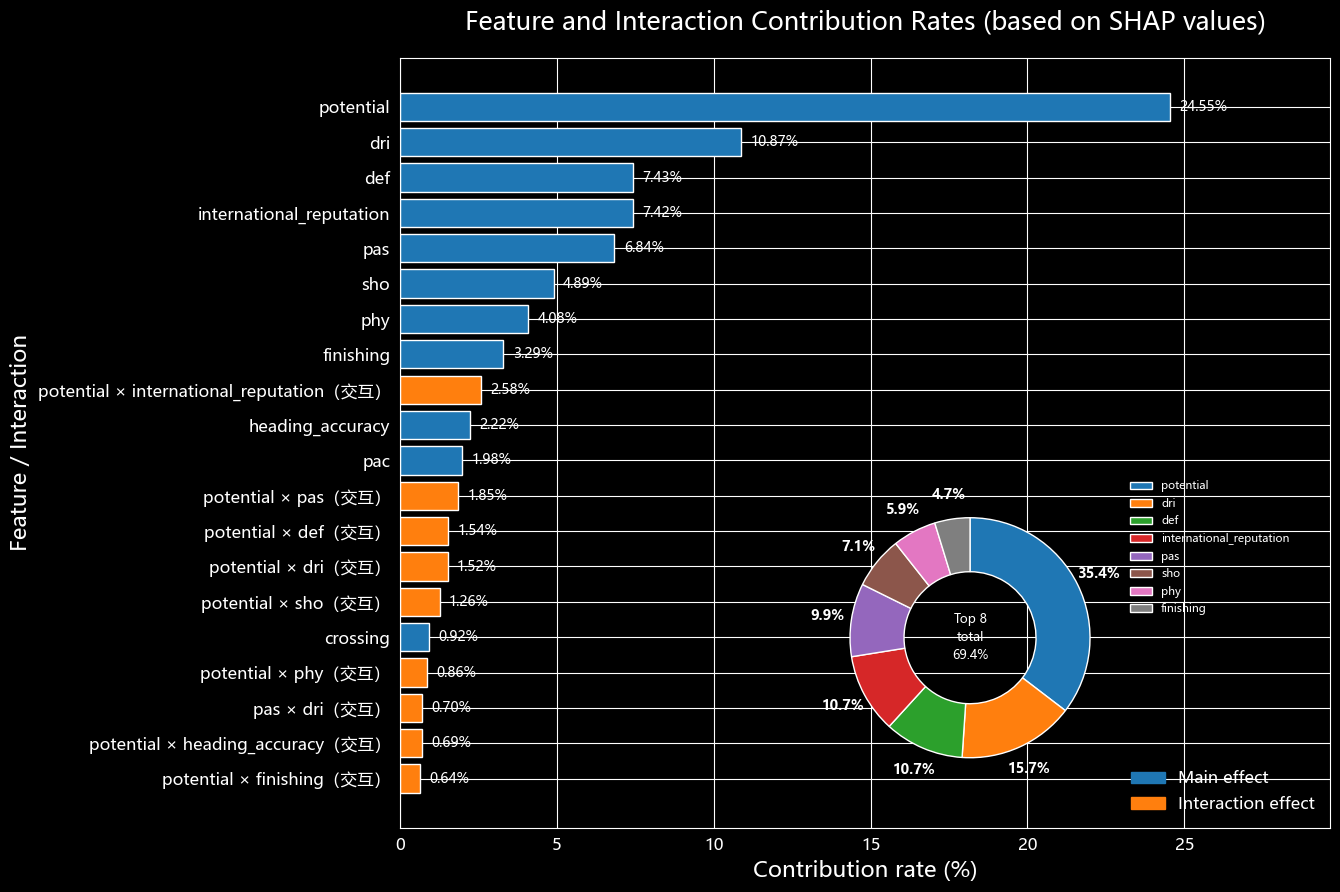

In [11]:
# 解决字体不支持中文导致的乱码问题
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'Arial Unicode MS', 'SimHei']  # 支持中文和符号
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('dark_background')  # 深色背景，与截图一致

# =============================
# 1️ 数据准备与排序
# =============================
df_vis = df_all.copy()
df_vis = df_vis.sort_values(by="contribution_rate(%)", ascending=False)  # 从高到低
df_vis = df_vis.head(20).copy()  # 取前20项

# =============================
# 2️ 特征名称处理
# =============================
def make_label(row):
    if row["type"] == "main":
        return row["feature_1"]
    else:
        # 用 “A × B（交互）” 明确标识交互项
        return f"{row['feature_1']} × {row['feature_2']}（交互）"

df_vis["name"] = df_vis.apply(make_label, axis=1)

# =============================
# 3️ 主图绘制
# =============================
fig, ax = plt.subplots(figsize=(12, 10))
colors_main = "#1f77b4"
colors_inter = "#ff7f0e"

bars = ax.barh(
    df_vis["name"],
    df_vis["contribution_rate(%)"],
    color=np.where(df_vis["type"] == "main", colors_main, colors_inter)
)

# 由于 barh 从下往上绘制，反转顺序使得最高值在上方
ax.invert_yaxis()

# 4️ 标题与坐标轴
ax.set_title("Feature and Interaction Contribution Rates (based on SHAP values)",
             fontsize=18, pad=20)
ax.set_xlabel("Contribution rate (%)", fontsize=16)
ax.set_ylabel("Feature / Interaction", fontsize=16)
ax.tick_params(axis="both", which="major", labelsize=12)

# 数值标签
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.3, bar.get_y() + bar.get_height()/2,
            f"{width:.2f}%", va='center', ha='left', fontsize=10)

ax.set_xlim(right=ax.get_xlim()[1] * 1.15)

# 图例
handles = [
    matplotlib.patches.Patch(color=colors_main, label="Main effect"),
    matplotlib.patches.Patch(color=colors_inter, label="Interaction effect")
]
ax.legend(handles=handles, loc="lower right", fontsize=12, frameon=False)

# =============================
# 5️ 环圈图（Top 8）
# =============================
top_subset = df_vis.head(8).copy()
total_top = top_subset["contribution_rate(%)"].sum()
top_subset["percent_in_top"] = 100 * top_subset["contribution_rate(%)"] / total_top

ax_inset = fig.add_axes([0.45, 0.15, 0.3, 0.3])
colors = matplotlib.colormaps.get('tab10').colors

wedges, texts = ax_inset.pie(
    top_subset["percent_in_top"],
    labels=None,
    colors=colors[:len(top_subset)],
    startangle=90,
    counterclock=False,
    wedgeprops=dict(width=0.45, edgecolor='w')
)

# 中心文字
ax_inset.text(0, 0, f"Top 8\ntotal\n{total_top:.1f}%", ha='center', va='center', fontsize=9, linespacing=1.5)

# 标签与线条优化
label_threshold = 2.0
y_text_offsets = {'left': 1.4, 'right': 1.4}
for i, p in enumerate(wedges):
    percent = top_subset["percent_in_top"].iloc[i]
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    if percent < label_threshold and percent > 0:
        side = 'right' if x > 0 else 'left'
        y_pos = y_text_offsets[side]
        y_text_offsets[side] += -0.2 if y > 0 else 0.2
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        ax_inset.annotate(f"{percent:.1f}%", xy=(x, y), xytext=(0.1*np.sign(x), y_pos),
                          fontsize=9, ha='center',
                          arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle))
    elif percent > 0:
        ax_inset.text(x * 1.2, y * 1.2, f"{percent:.1f}%", ha='center', va='center', fontsize=10, fontweight='bold')

ax_inset.legend(
    wedges,
    top_subset["name"],
    loc="center left",
    bbox_to_anchor=(1, 0.8),
    frameon=False,
    fontsize=8
)

# =============================
# 6️ 保存与展示
# =============================
plt.savefig("shap_contribution_plot_refined_dark.jpg", dpi=300, bbox_inches="tight")
plt.show()

In [4]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
from scipy.signal import savgol_filter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ===============================
# 1️ PDP 计算 + 平滑边际效应
# ===============================
pdp_results = []

for feat in cols_x:
    try:
        pdp = partial_dependence(
            model,
            X=data[cols_x],
            features=[feat],
            grid_resolution=50
        )

        grid = pdp.grid_values[0]
        avg_preds = pdp.average[0]

        # —— 使用平滑滤波减少噪声与竖线伪影 ——
        if len(avg_preds) > 5:
            avg_preds = savgol_filter(avg_preds, 5, 2)

        # —— 计算边际效应（单位变化的响应变化） ——
        slopes = np.diff(avg_preds) / np.diff(grid)
        mean_slope = np.mean(np.abs(slopes))

        pdp_results.append({
            "feature": feat,
            "avg_unit_effect": mean_slope
        })

    except Exception as e:
        print(f"⚠️ 特征 {feat} PDP 计算失败: {e}")
        continue

# ===============================
# 2️ 结果归一化为贡献率
# ===============================
df_pdp = pd.DataFrame(pdp_results).sort_values("avg_unit_effect", ascending=False)
# df_pdp["pdp_contribution(%)"] = (
#     100 * df_pdp["avg_unit_effect"] / df_pdp["avg_unit_effect"].sum()
# )
print("\n PDP 单位变化边际效应（平均）:")
print(df_pdp)

# 3️ 可视化 PDP 曲线（前6个特征）
# ===============================
plt.style.use('dark_background')
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

ymins, ymaxs = [], []

# ==== 第一次循环：计算全局y范围 ====
for feat in df_pdp["feature"].head(6):
    pdp = partial_dependence(model, X=data[cols_x], features=[feat], grid_resolution=50)
    grid = pdp.grid_values[0]
    avg_preds = pdp.average[0]

    if len(avg_preds) > 5:
        avg_preds = savgol_filter(avg_preds, 5, 2)

    mask = (grid > np.percentile(grid, 2)) & (grid < np.percentile(grid, 98))

    ymins.append(np.min(avg_preds[mask]))
    ymaxs.append(np.max(avg_preds[mask]))

# 统一y轴范围（稍微扩展一点，避免边界紧贴）
ymin_global = min(ymins)
ymax_global = max(ymaxs)
y_margin = (ymax_global - ymin_global) * 0.05
ymin_global -= y_margin
ymax_global += y_margin

# ==== 第二次循环：绘图 ====
for i, feat in enumerate(df_pdp["feature"].head(6)):
    pdp = partial_dependence(model, X=data[cols_x], features=[feat], grid_resolution=50)
    grid = pdp.grid_values[0]
    avg_preds = pdp.average[0]

    if len(avg_preds) > 5:
        avg_preds = savgol_filter(avg_preds, 5, 2)

    mask = (grid > np.percentile(grid, 2)) & (grid < np.percentile(grid, 98))

    axes[i].plot(grid[mask], avg_preds[mask], color='deepskyblue', lw=2)
    axes[i].set_title(f"PDP - {feat}\n(mean slope={df_pdp.iloc[i,1]:.4f})", fontsize=12)
    axes[i].set_xlabel(feat)
    axes[i].set_ylabel("Partial dependence")

    # 统一纵坐标范围
    axes[i].set_ylim(ymin_global, ymax_global)

plt.tight_layout()
plt.show()

NameError: name 'cols' is not defined

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from joblib import dump, load

# 1️ 加载数据
data = pd.read_csv(r"D:\文档\作战效能\xgboost_try_data\data\train.csv")

# 定义所有潜在特征
all_features = [
    'height_cm', 'weight_kg', 'potential', 'pac', 'sho',
    'pas', 'dri', 'def', 'phy', 'international_reputation',
    'skill_moves', 'weak_foot', 'preferred_foot',
    'crossing', 'finishing', 'heading_accuracy'
]
target_col = "y"

data = data[all_features + [target_col]]

# 2️ 模拟“未来可能新增的特征” + 保留少量真实样本
used_features = all_features[:10]      # 当前主要特征
future_features = all_features[10:]    # 未来潜在新增特征

#法一：保存少量数据供学习
# 对未来特征随机部分保留真实值
retain_ratio = 0.3  # 10% 样本保留真实值
for feat in future_features:
    data[feat] = data[feat].astype(float)
    mask = np.random.rand(len(data)) > retain_ratio
    data.loc[mask, feat] = np.nan

#法二：对新增特征数值全设为nan
# for feat in future_features:
#     data[feat] = data[feat].astype(float)
#     data.loc[:, feat] = np.nan

# 3️ 数据归一化（防止量纲问题）

data = data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
# ============================================================
# 4️ 划分训练集与测试集
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    data[all_features], data[target_col], test_size=0.2, random_state=42
)
print("训练数据形状：", X_train.shape)


# 5️ 训练 XGBoost 模型
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "eta": 0.1,
    "max_depth": 8,
    "subsample": 0.6,
    "colsample_bytree": 0.6,
    "nthread": -1,
    "seed": 42,
    "learning_rate": 0.01
}

model = XGBRegressor(**params, n_estimators=300)
model.fit(X_train, y_train)

# 保存模型
dump(model, "xgb_model_adaptive.pkl")
print(" 模型已训练并保存")


# 6️ 模拟预测阶段（任意新增特征组合）

# 加载模型
model_loaded = load("xgb_model_adaptive.pkl")

# 复制测试数据作为预测输入
new_data = X_test.copy()

# 假设我们现在“新增获取了 crossing 特征”
new_data["finishing"] = data.loc[new_data.index, "finishing"]

# 确保列顺序一致
new_data = new_data[all_features]

# 直接预测
y_pred_new = model_loaded.predict(new_data)

# 7️ 评估结果
mse = mean_squared_error(y_test, y_pred_new)
mae = mean_absolute_error(y_test, y_pred_new)
r2 = r2_score(y_test, y_pred_new)

print(f"\n 模型预测结果:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

训练数据形状： (8352, 16)
 模型已训练并保存

 模型预测结果:
MSE: 0.0007
MAE: 0.0114
R²: 0.9069


In [3]:
import os, sys
from joblib import load
import tkinter as tk
from tkinter import messagebox

# ============== 路径修复函数 ==============
def resource_path(relative_path):
    """获取资源文件的绝对路径（支持 PyInstaller 打包后）"""
    try:
        # PyInstaller 创建临时文件夹，并把路径存在 _MEIPASS
        base_path = sys._MEIPASS
    except Exception:
        base_path = os.path.abspath(".")
    return os.path.join(base_path, relative_path)

# ============== 1. 加载模型 ==============
model_path = resource_path("xgb_model_adaptive.pkl")   # 自动识别路径
model = load(model_path)

# ============== 2. 特征名称 ==============
feature_names = [
    'height_cm', "weight_kg", 'potential', 'pac', 'sho', 'pas', 'dri',
    'def', 'phy', 'international_reputation', 'skill_moves', 'weak_foot',
    'preferred_foot', "crossing", "finishing", "heading_accuracy"
]

# ============== 3. 预测函数 ==============
def predict():
    try:
        values = [float(entry.get()) for entry in entries]
        X = np.array(values).reshape(1, -1)
        y_pred = model.predict(X)
        messagebox.showinfo("预测结果", f"预测的 Y 值为：{y_pred[0]:.3f}")
    except ValueError:
        messagebox.showerror("错误", "请确保所有输入都是数字。")
    except Exception as e:
        messagebox.showerror("错误", str(e))

# ============== 4. 创建界面 ==============
root = tk.Tk()
root.title(" XGBoost 预测器")
root.geometry("360x700")
root.configure(bg="white")

tk.Label(root, text="请输入各特征值：", font=("Arial", 12, "bold"), bg="white").pack(pady=10)

entries = []
for feat in feature_names:
    frame = tk.Frame(root, bg="white")
    frame.pack(pady=4)
    tk.Label(frame, text=feat, width=22, anchor="w", bg="white").pack(side="left")
    e = tk.Entry(frame, width=10)
    e.pack(side="right")
    entries.append(e)

tk.Button(
    root, text="开始预测", command=predict,
    bg="#4CAF50", fg="white", width=15, height=1
).pack(pady=20)

root.mainloop()